![](https://obiblioteka.vrn.muzkult.ru/media/2018/10/01/1218497299/image_image_4849147.jpg)

## <a name="beginning"> Оценка влияния акции "день без автомобиля" на количество ТС </a>

### Введение

Акция "день без автомобиля" прошла 22.09 (среда). Количество ТС в этот день составило 3,22 млн. Это меньше, чем:
- в предыдущий день, 21.09 (вторник), когда было 3,24 млн ТС;
- на следующий день, 23.09 (четверг), когда было 3,25 млн ТС; 
- неделю раньше, 15.09 (среда), когда было 3,30 млн ТС;
- неделю позже, 29.09 (среда), когда было 3,28 млн ТС.

Однако такое снижение количества ТС в день проведения акции могло быть случайным. Чтобы это проверить, оценим статистическую значимость влияния акции на количество ТС.

План проведения оценки:
- загрузим данные с фактическим количеством ТС по дням с 01.07 до 27.10 (до локдауна);
- загрузим данные с прогнозируемым количеством ТС по дням с 01.07 до 27.10 (прогноз, сделанный за сутки до фактической даты);
- оценим ошибку прогноза по сравнению с фактическим количеством ТС по дням (в том числе в дату проведения акции "день без автомобиля");
- построим распределение ошибок прогноза;
- оценим вероятность получить ошибку, равную ошибке прогноза в день проведения акции, или ещё большую ошибку (другими словами, оценим статистическую значимость влияния акции на количество ТС).

Допущения:
- модель, которая строит прогноз количества ТС, "не знала" об акции накануне её проведения и не могла скорректировать прогноз.

### Загрузка данных

Загружаем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import scipy.stats as st
from IPython.display import Image
warnings.simplefilter('ignore')

Загружаем данные с фактическим и прогнозируемым кол-вом ТС по дням:

In [2]:
df = pd.read_excel('/Users/Polzovatel/Desktop/ИЦ/факт_прогноз_число_ТС.xlsx')

Выведем первые 5 строк таблицы:

In [3]:
df.head()

,day,date,fact,predict,delta
0,чт,2021-07-01,3.01,3.01,0.00
1,пт,2021-07-02,3.02,3.04,0.02
2,сб,2021-07-03,2.76,2.64,-0.12
3,вс,2021-07-04,2.52,2.46,-0.06
4,пн,2021-07-05,2.95,2.91,-0.04


In [4]:
len(df)

119

С 01.07 до 27.10 119 дней.

Найдём день проведения акции:

In [5]:
df[df['date'] == '2021-09-22']

,day,date,fact,predict,delta
83,ср,2021-09-22,3.22,3.28,0.06


Прогноз количества ТС в этот день оказался на 0,06 млн больше фактического количества ТС.

Удалим этот день из таблицы, чтобы оставить только дни, с которыми мы будем его сравнивать:

In [6]:
df = df.drop(83)
len(df)

118

В таблице осталось 118 дней.

### Ошибка прогноза по дням

Построим график фактического и прогнозируемого количества ТС по дням:

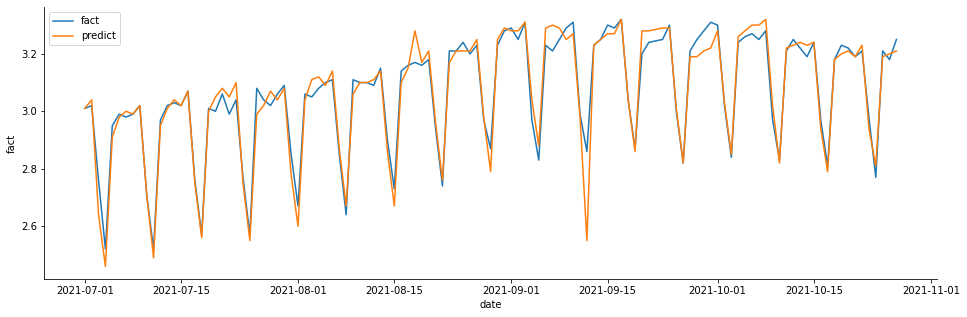

In [7]:
plt.figure(figsize=(16, 5))
sns.lineplot(x='date', y='fact',data=df, label='fact')
sns.lineplot(x='date', y='predict',data=df, label='predict')
sns.despine() 

Построим график ошибки прогноза по дням:

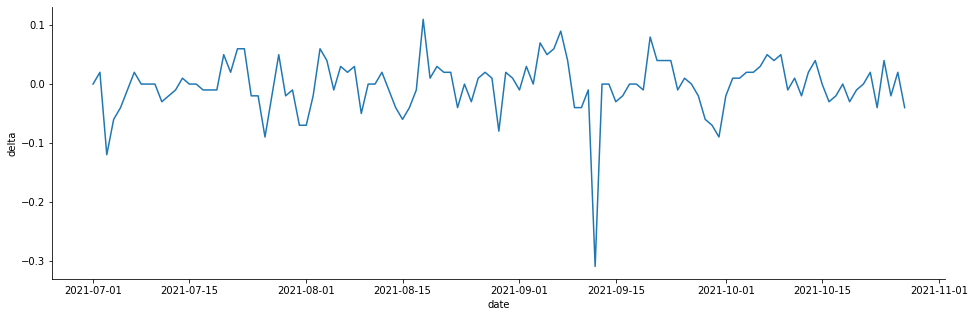

In [8]:
plt.figure(figsize=(16, 5))
sns.lineplot(x='date', y='delta',data=df)
sns.despine() 

На обоих графиках заметен один выброс, найдём его в данных:

In [9]:
df[df['delta'] == df['delta'].min()]

,day,date,fact,predict,delta
73,вс,2021-09-12,2.86,2.55,-0.31


12.09 прогноз был на 0.31 млн ТС меньше, чем фактическое количество ТС. 12.09 был день города. Будем считать этот день аномальным с точки зрения прогноза, поэтому удалим его из таблицы:

In [10]:
df = df.drop(73)
len(df)

117

В таблице осталось 117 дней.

Построим еще раз график ошибки прогноза по дням:

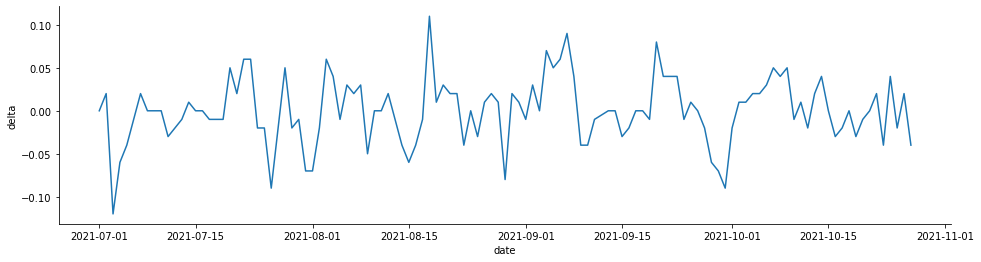

In [11]:
plt.figure(figsize=(16, 4))
sns.lineplot(x='date', y='delta',data=df)
sns.despine() 

Теперь выбросов нет, ошибка колеблется в диапазоне примерно +-0.1 млн ТС.

### Распределение ошибки прогноза

Построим распределение ошибки прогноза:

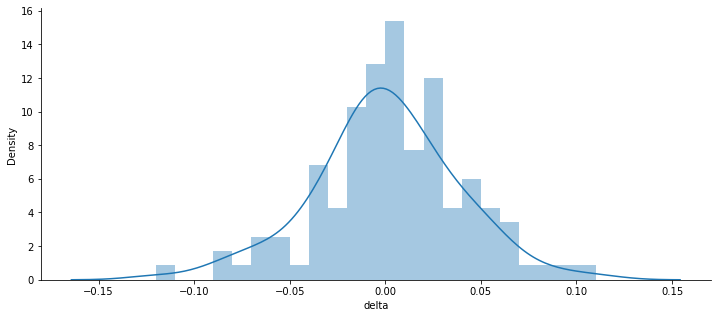

In [12]:
plt.figure(figsize=(12, 5))
sns.distplot(df['delta'], bins=23)
sns.despine() 

Распределение похоже на нормальное. Оценим вероятность получить такое распределение в выборке при условии, что распределение в ГС нормальное. Для этого проведём тест Шапиро-Уилка. Критическое значение альфа примем равным 0,05.

In [13]:
results = st.shapiro(df['delta'])
p_value = results[1]
p_value

0.1563173085451126

Вероятность нормальности распределения в ГС составляет 15,6%, это больше альфа. Поэтому у нас недостаточно оснований отклонить гипотезу о нормальном распределении ошибки прогноза в ГС.

Оценим среднее и стандартное отклонение в ГС:

In [14]:
mean_ = df['delta'].mean()
std_ = df['delta'].std()
mean_, std_

(-0.00034188034188034215, 0.03819034956480642)

### Оценка влияния акции на количество ТС

Так как изначально мы не знали, как акция отразится на количестве ТС (уменьшит, потому что люди примут в ней участие, или увеличит, потому что люди решат, что на дорогах будет свободнее, и воспользуются автомобилями), то будем проверять двустороннюю нулевую гипотезу. Сформулируем её, а также альтернативную гипотезу: 
- Н0: акция "день без автомобиля" не оказала влияние на количество ТС, а отклонение кол-ва ТС от прогноза является случайным;
- Н1: акция "день без автомобиля" оказала влияние на количество ТС.

Критическое значение альфа примем равным 0,05.

Оценим вероятность получить ошибку, равную ошибке прогноза в день проведения акции, или ещё большую ошибку для ГС:

In [15]:
distr = st.norm(0, std_) # для удобства округляем среднее ГС до нуля
pvalue = distr.cdf(-.06) * 2
pvalue

0.1161646416111309

Визуализируем вероятность ошибки и более крайних отклонений, воспользуемся он-лайн калькулятором:

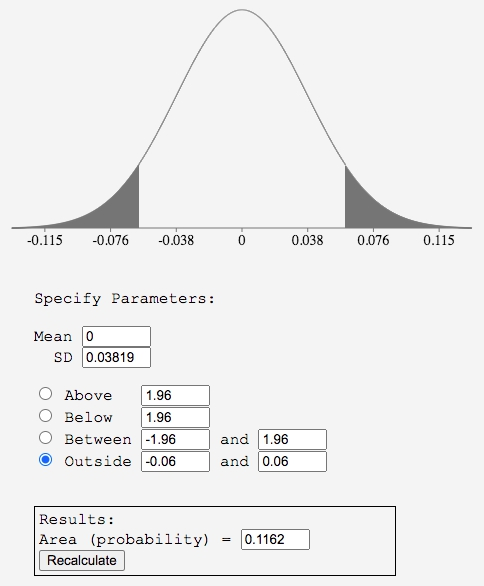

In [16]:
Image(filename='/Users/Polzovatel/Desktop/1636220337446.jpg', width=500, height=500)

На графике закрашены отклонения, равные +-0,06, и более сильные отклонения. Площадь закрашенных участков составляет 11,6% от площади под кривой всего распределения. Так как это больше альфа, то у нас недостаточно оснований отклонить нулевую гипотезу.

На графике также отмечены метки, равные двум стандартным отклонениям (+-0,076). Видно, что ошибка прогноза в день акции отклонилась от среднего меньше, чем на два стандартных отклонения. 

### Вывод

После апроксимации выборки из ошибок прогноза с 01.07 до 27.10 до нормального распределения с соответствующими средним значением и стандартным отклонением была рассчитана вероятность получить ошибку, равную ошибке прогноза в день проведения акции, или ещё большую ошибку. Вероятность составила 11,6%. При выбранном критическом значении альфа, равном 0,05, это означает, что у нас недостаточно оснований отклонить нулевую гипотезу о том, что акция "день без автомобиля" не оказала влияние на количество ТС, а отклонение кол-ва ТС от прогноза является случайным.

[В начало](#beginning)